# Random numbers - Exercise 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

In [3]:
r = np.random.seed(100)
x = np.linspace(0, 1000, 1000)
ran = np.random.random(1000)
auto_corr = np.correlate(ran, ran, mode='full')
x_corr = np.linspace(0, 1000, 1999)

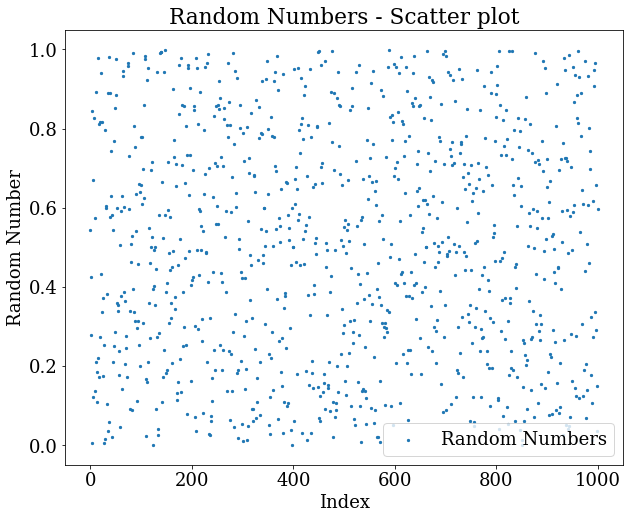

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, ran, s=5, label='Random Numbers')
ax.set(xlabel='Index', ylabel='Random Number', title='Random Numbers - Scatter plot')  
ax.legend()

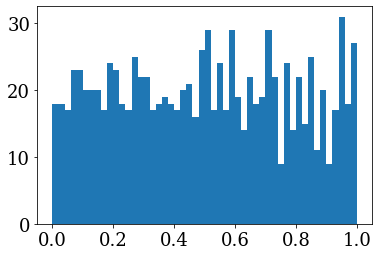

In [5]:
plt.hist(ran, bins=50);

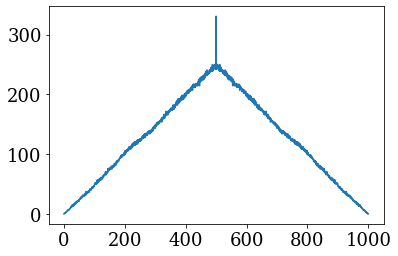

In [6]:
plt.plot(x_corr, auto_corr)

In [7]:
# time the random number generator  
import time
start = time.time()
np.random.random(10000)
end = time.time()
timer1 = end - start
print("Time taken to generate 10,000 random numbers: ", timer1)


Time taken to generate 10,000 random numbers:  0.0005612373352050781


In [8]:
start = time.time()
np.random.random(1000)
end = time.time()
timer2 = end - start
print("Time taken to generate 1,000 random numbers: ", timer2)
print(f"Time taken to generate 10,000 random numbers is {timer1/timer2:.3f} times longer than generating 1,000 random numbers.")

Time taken to generate 1,000 random numbers:  0.0001838207244873047
Time taken to generate 10,000 random numbers is 3.053 times longer than generating 1,000 random numbers.


# Exercise 1

In [9]:
radius = 5.2
N_iterations = 100

def MC_circle(radius, N_iterations):
    accept = [] 
    reject = []

    random_numbers = np.random.uniform(-radius, radius, N_iterations + 1)

    for i in range(N_iterations):
        x = random_numbers[i]
        y = random_numbers[i+1]
        
        if x**2 + y**2 < radius**2:
            accept.append((x, y))
        else:
            reject.append((x, y))

    area = len(accept)/N_iterations * (2*radius)**2
    
    return accept, reject, area

accept, reject, area = MC_circle(radius, N_iterations)

The area of the circle is 86.528. Analytical value is 84.949.


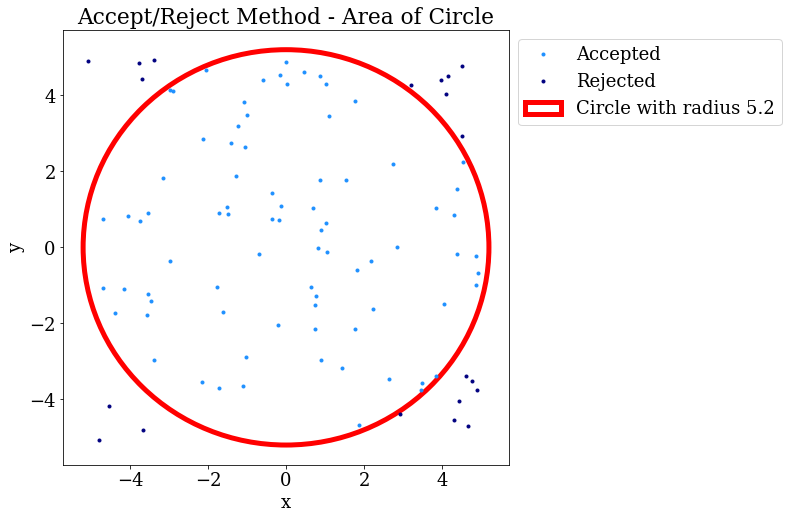

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([x[0] for x in accept], [y[1] for y in accept], '.', color='dodgerblue', label='Accepted')
ax.plot([x[0] for x in reject], [y[1] for y in reject], '.', color='navy', label='Rejected')
ax.set(xlabel='x', ylabel='y', title='Accept/Reject Method - Area of Circle') 

circle = plt.Circle((0.0, 0.0), radius, color='red', lw = 5, fill = False, label='Circle with radius 5.2')
ax.add_patch(circle)

ax.legend(bbox_to_anchor=(1, 1))

print(f'The area of the circle is {area:.3f}. Analytical value is {np.pi*radius**2:.3f}.')

# Exercise 2

In [11]:
N_trials = 1000

areas = np.zeros(N_trials)

for i in range(N_trials):
    accept, reject, areas[i] = MC_circle(radius, N_iterations) 

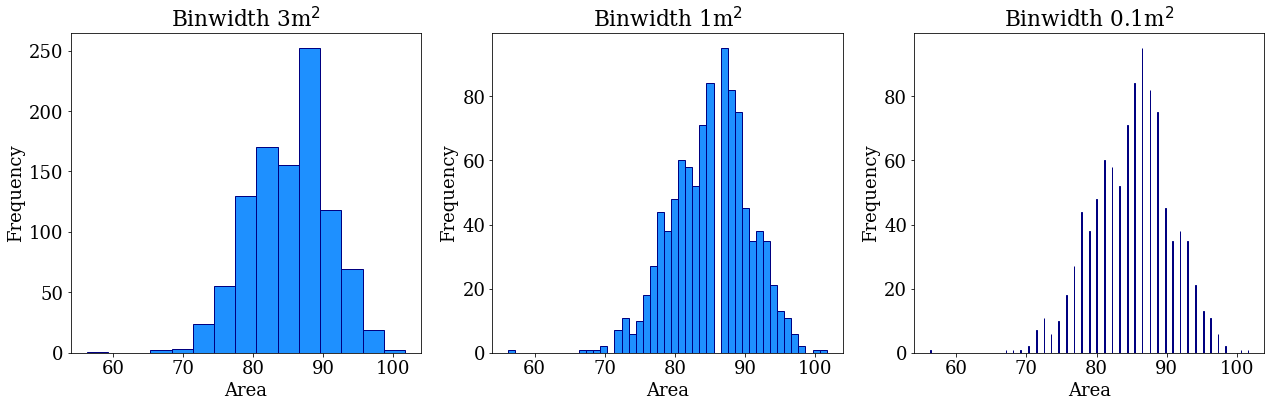

In [12]:
histrange = (np.min(areas), np.max(areas))
range_width = histrange[1] - histrange[0]
binwidth = np.array([3, 1, 0.1])
bins = np.array([int(np.round(range_width / i)) for i in binwidth])

fig, axs = plt.subplots(figsize=(18, 6), ncols=3)

axs[0].hist(areas, bins=bins[0], range=histrange, color='dodgerblue', edgecolor='navy')
axs[1].hist(areas, bins=bins[1], range=histrange, color='dodgerblue', edgecolor='navy')
axs[2].hist(areas, bins=bins[2], range=histrange, color='dodgerblue', edgecolor='navy')

axs[0].set(xlabel='Area', ylabel='Frequency', title=r'Binwidth 3m$^2$')
axs[1].set(xlabel='Area', ylabel='Frequency', title=r'Binwidth 1m$^2$')
axs[2].set(xlabel='Area', ylabel='Frequency', title=r'Binwidth 0.1m$^2$')

fig.tight_layout()

# Exercise 3

In [13]:
throws = np.array([10, 100, 1000, 10000, 100000])

def cal_pi(radius, N_iterations):
    accept = [] 
    reject = []

    random_numbers = np.random.uniform(-radius, radius, N_iterations + 1)

    for i in range(N_iterations):
        x = random_numbers[i]
        y = random_numbers[i+1]
        
        if x**2 + y**2 < radius**2:
            accept.append((x, y))
        else:
            reject.append((x, y))

    pi_estimate = len(accept)/N_iterations * 4
    
    return pi_estimate

In [16]:
pi_estimates = np.zeros(len(throws))

for i in range(len(throws)):
    pi_estimates[i] = cal_pi(radius, throws[i])

[None]

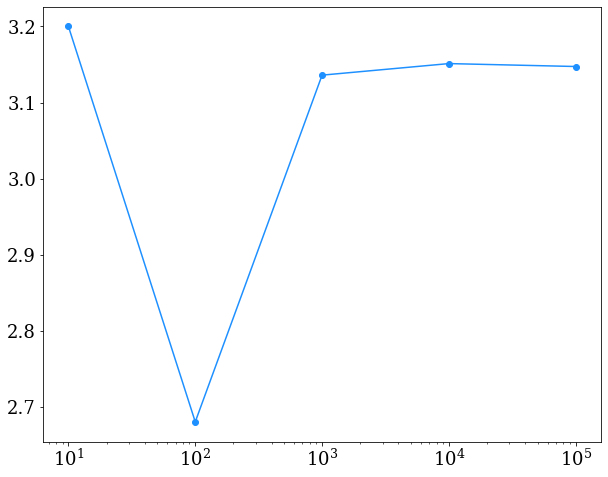

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(throws, pi_estimates, 'o-', color='dodgerblue')
ax.set(xscale='log')